# Trabajo Práctico 1 de Visión por Computadora I
## Laboratorio de Sistemas Embebidos - FIUBA
## Integrantes:
- Federico Arias
- Hernán Matías Silva

In [1]:
# Importamos bibliotecas
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

<h1 style='color:red;'>Parte 1</h1>

### 1.1 Implementar el algoritmo de pasaje a coordenadas cromaticas para librarnos de las variaciones de contraste.

In [2]:
#Leemos las imágenes:
path = 'coord_cromaticas/'

for i in range(1, 4):
    img = cv.imread(path + f'CoordCrom_{i}.png', cv.IMREAD_COLOR)
    # Convertir de BGR a RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # Asignar la imagen convertida a una variable dinámica
    exec(f'img_rgb_{i} = img_rgb')

In [3]:
#Vemos el shape de la img
img_rgb.shape

(996, 908, 3)

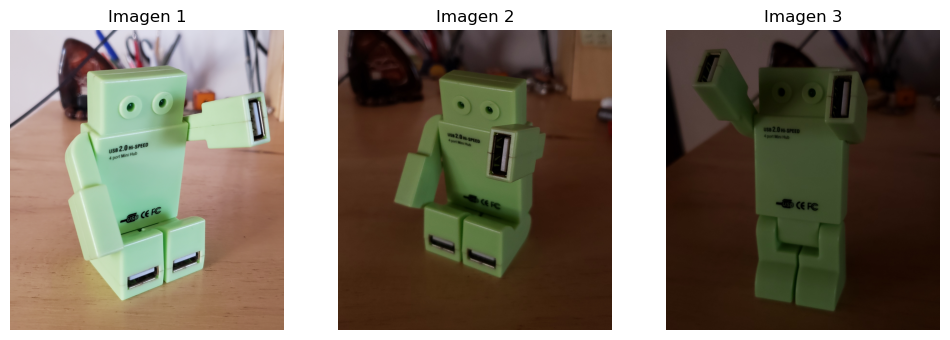

In [4]:
# Vemos las imágenes:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Creamos el subplot
for i, ax in enumerate(axes):
    ax.imshow(eval(f'img_rgb_{i+1}'))
    ax.set_title(f'Imagen {i+1}')
    ax.axis('off')

El paso a coordenadas cromáticas implica normalizar estos valores RGB para obtener una representación que enfatice el color puro, independientemente de la intensidad de luz. 

Esto es útil en situaciones donde la iluminación varía, pero se desea extraer la información del color puro.

Vamos a usar el algoritmo visto en clase llamado 'balance de color' en el cual multiplicamos cada canal por un factor de escala diferente.

In [5]:
sum_channels = np.sum(img_rgb, axis=2, keepdims=True)
sum_channels.shape #tiene la dimension de la imagen, la suma representa un solo 'canal'

(996, 908, 1)

In [6]:
#Creamos la función para modificar la img_i y aplicar el algoritmo:

def get_chromatic_coord(img, s):
    sum_channels = np.sum(img, axis=2, keepdims=True)
    
    #multplicamos por el factor 's'
    sum_channels = sum_channels*s

    #Notar que usamos la suma de numpy y no la suma de uint8 porque si sumamos en np la imagen no se satura ni existe overflow

    # Evitar división por cero
    sum_channels[sum_channels == 0] = 1

    # Calcular las coordenadas cromáticas
    g = s*img[:, :, 1] / sum_channels[:, :, 0]
    b = s*img[:, :, 2] / sum_channels[:, :, 0]    #La suma es siempre 1: b + r + g = 1
    r = 1 - b - g    

    r_img = (r * 255).astype(np.uint8)
    g_img = (g * 255).astype(np.uint8)
    b_img = (b * 255).astype(np.uint8)

    # Combinamos los canales para formar la nueva imagen
    img_chromatic = cv.merge([r_img, g_img, b_img])

    return img_chromatic

Text(0.5, 1.0, 'Imagen 3')

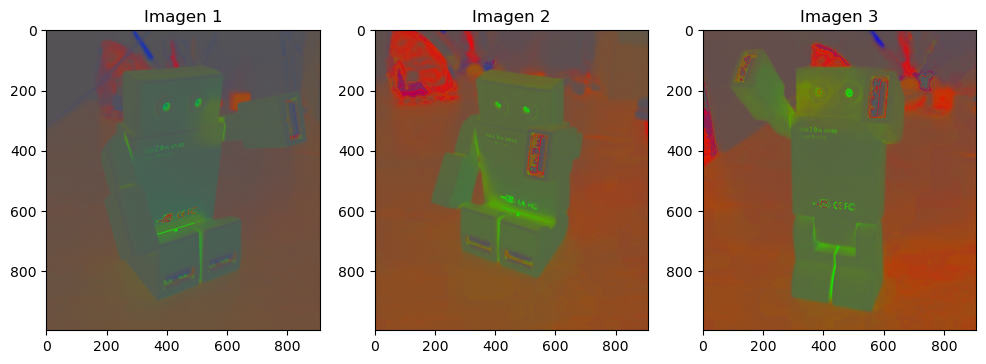

In [7]:
#Generamos las imágenes cromadas:
img_1_cromada = get_chromatic_coord(img_rgb_1, 0.5)  
img_2_cromada = get_chromatic_coord(img_rgb_2, 1.5)  
img_3_cromada = get_chromatic_coord(img_rgb_3, 0.01)  

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# Mostrar las imágenes en los subplots
axes[0].imshow(img_1_cromada)
axes[1].imshow(img_2_cromada)
axes[2].imshow(img_3_cromada)
# Establecer los títulos
axes[0].set_title('Imagen 1')
axes[1].set_title('Imagen 2')
axes[2].set_title('Imagen 3')

### 1.2 Implementar el algoritmo de White Patch para librarnos de las diferencias de color de iluminacion.

Para aplicar este algoritmo, necesitamos normalizar la imagen, multiplicando cada pixel por el cociente entre el valor máximo del canal dividido 255.


In [8]:
def get_patched_image(img):
    #Buscamos el máximo para cada canal:
    r_max = np.max(img[:, :, 0])
    g_max = np.max(img[:, :, 1])
    b_max = np.max(img[:, :, 2])

    #Normalizamos
    img_red_patched = np.clip(img[:, :, 0] * (255.0 / r_max), 0, 255).astype(np.uint8)
    img_green_patched = np.clip(img[:, :, 1] * (255.0 / g_max), 0, 255).astype(np.uint8)
    img_blue_patched = np.clip(img[:, :, 2] * (255.0 / b_max), 0, 255).astype(np.uint8)

    # Combinamos los canales normalizados en una nueva imagen
    img_patched = cv.merge([img_red_patched, img_green_patched, img_blue_patched])

    return img_patched

### 1.3 Mostrar los resultados obtenidos y analizar las posibles fallas

Text(0.5, 1.0, 'Imagen 1 con White Patch')

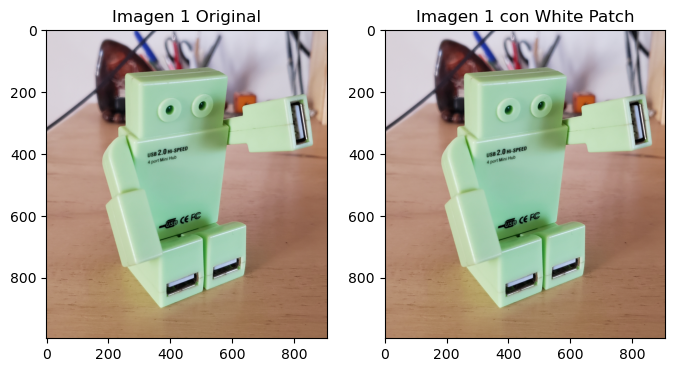

In [9]:
img_1_patched = get_patched_image(img_rgb_1)

#Mostramos la imagen original vs la imagen con White Patch:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Mostrar las imágenes en los subplots
axes[0].imshow(img_rgb_1)
axes[1].imshow(img_1_patched)

axes[0].set_title('Imagen 1 Original')
axes[1].set_title('Imagen 1 con White Patch')


Text(0.5, 1.0, 'Imagen 2 con White Patch')

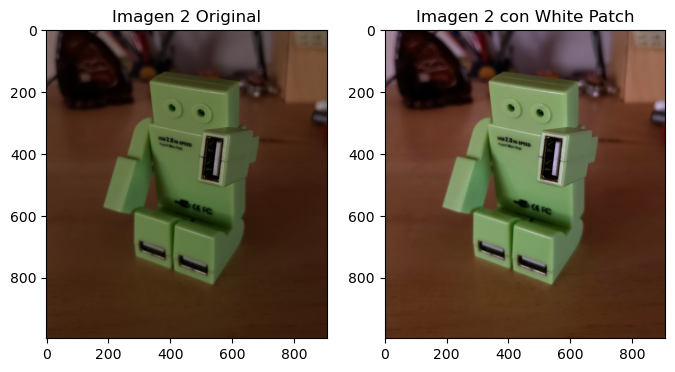

In [10]:
img_2_patched = get_patched_image(img_rgb_2)

#Mostramos la imagen original vs la imagen con White Patch:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Mostrar las imágenes en los subplots
axes[0].imshow(img_rgb_2)
axes[1].imshow(img_2_patched)

axes[0].set_title('Imagen 2 Original')
axes[1].set_title('Imagen 2 con White Patch')


Text(0.5, 1.0, 'Imagen 3 con White Patch')

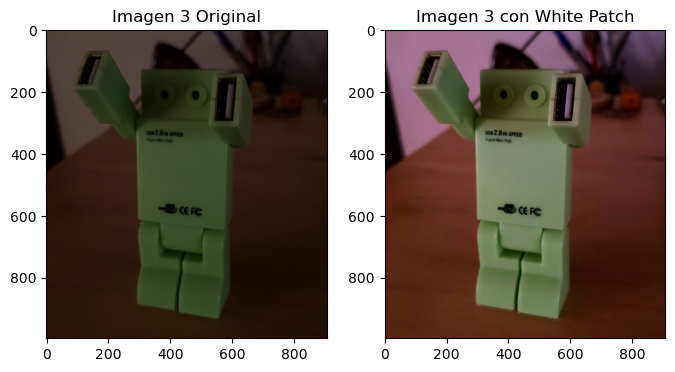

In [11]:
img_3_patched = get_patched_image(img_rgb_3)

#Mostramos la imagen original vs la imagen con White Patch:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Mostrar las imágenes en los subplots
axes[0].imshow(img_rgb_3)
axes[1].imshow(img_3_patched)

axes[0].set_title('Imagen 3 Original')
axes[1].set_title('Imagen 3 con White Patch')

Posibles fallas del algoritmo:
- **Dependencia en un Píxel Máximo**: si el píxel más brillante es de un color saturado, el balance de blancos puede exagerar los colores, resultando en una imagen con un tono incorrecto. Ejemplo la imagen1 que pareciera no tener cambios luego de aplicar white patch.

- **Sensibilidad al ruido**: Un solo píxel ruidoso con un valor anormalmente alto puede distorsionar el balance de blancos, lo que lleva a resultados no deseados.

- **No Considera la Distribución Global de Colores**: White Patch solo se fija en los valores máximos, ignorando la distribución general de colores en la imagen. Esto puede causar que los colores predominantes en la imagen (que podrían definir mejor el color dominante de la luz) no se tomen en cuenta, lo que podría resultar en un balance de blancos inadecuado.

- **Problemas con Iluminación**: En escenas con múltiples fuentes de luz de diferentes colores o en condiciones de iluminación no uniforme (por ejemplo, sombras y luces mezcladas), el algoritmo puede fallar en proporcionar un balance de blancos adecuado.

- **Limitación en Escenarios Bajo Exposición**: Puede suceder que el píxel más brillante puede estar lejos de ser blanco, lo que puede llevar a una compensación insuficiente en el balance de blancos.


<h1 style='color:red;'>Parte 2</h1>

### 2.1 Para las imágenes img_1_tp.png y img_2_tp.png leerlas con OpenCv en escala de grises y visualizarlas.

In [12]:
img_1_gray = cv.imread( 'img1_tp.png',cv.IMREAD_GRAYSCALE)
img_2_gray = cv.imread( 'img2_tp.png',cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Img 1 en GrayScale')

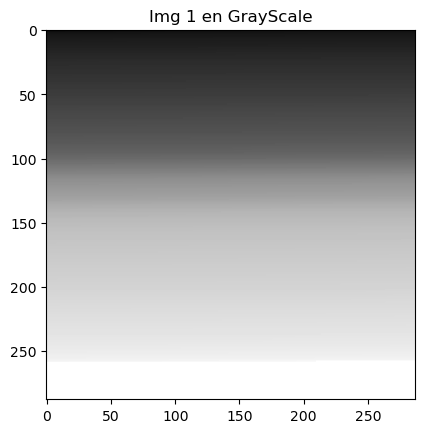

In [13]:
plt.imshow(img_1_gray, cmap='gray')
plt.title('Img 1 en GrayScale')

Text(0.5, 1.0, 'Img 2 en GrayScale')

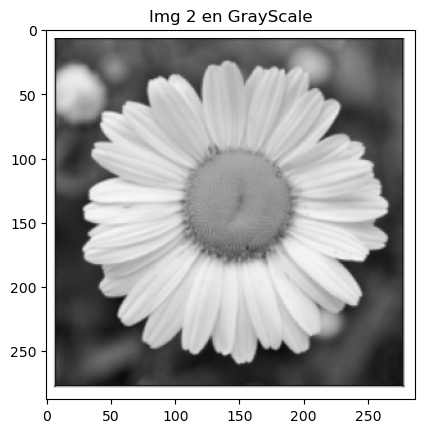

In [14]:
plt.imshow(img_2_gray, cmap='gray')
plt.title('Img 2 en GrayScale')

### 2.2 Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
### Explicar lo que observa, si tuviera que entrenar un modelo de detección de imágenes, considera que puede ser de utilidad tomar como 'features' a los histogramas?

Text(0.5, 1.0, 'Histograma Imagen 2')

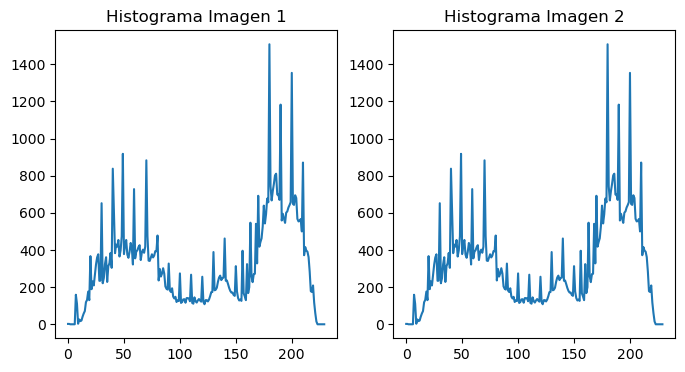

In [15]:
# Calculamos el histograma para las dos imágenes en escala de grises
bins = 230
hist_1 = cv.calcHist([img_1_gray], [0], None, [bins], [np.min(img_1_gray), np.max(img_1_gray)])

hist_2 = cv.calcHist([img_2_gray], [0], None, [bins], [np.min(img_2_gray), np.max(img_2_gray)])

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Mostrar las imágenes en los subplots
axes[0].plot(hist_1)
axes[1].plot(hist_2)

axes[0].set_title('Histograma Imagen 1')
axes[1].set_title('Histograma Imagen 2')


Por sorpresa vemos que los histogramas son muy parecidos.
Entendemos que es porque las imágenes están en escala de grises, entonces pueden tener la misma distribución de intensidades de píxeles.
Como la primer imagen es un degrade de colores, nos llevaría a pensar que es la misma imagen de la flor, pero es una versión permutada de la flor.

Respondiendo a la pregunta relacionada a usar el histograma como un detector de objetos, la respuesta es negativa, ya que como vemos un mismo histograma puede representar muchas imágenes distintas, el histograma olvida el orden de los pixeles, lo cual es clave para detectar formas o figuras en una imagen.

### 3. Para la imagen 'segmentacion.png' analice el histograma de los canales RGB. Segmente alguno de los elementos presentes en la imagen (agua, cielo y tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

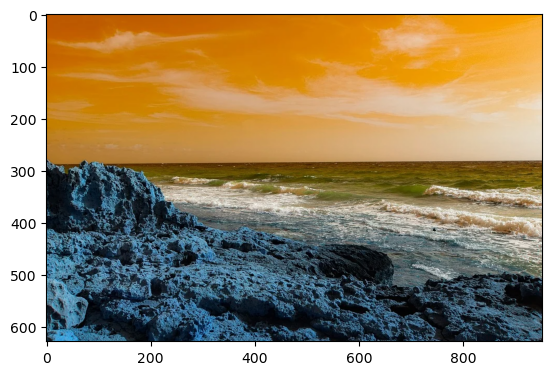

In [16]:
segmentacion_img = cv.imread('segmentacion.png', cv.IMREAD_COLOR)
plt.imshow(segmentacion_img)

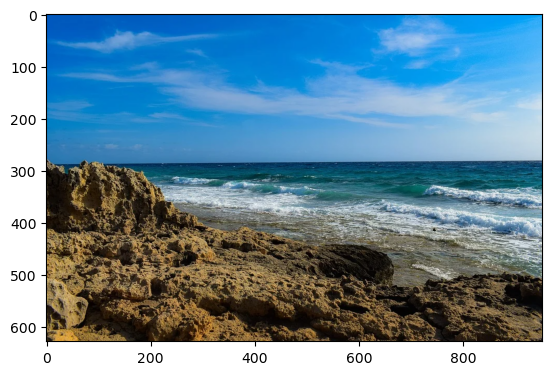

In [17]:
#Vamos a intercambiar los canales para verlas en RGB:
segmentacion_img_rgb = cv.cvtColor(segmentacion_img, cv.COLOR_BGR2RGB)
plt.imshow(segmentacion_img_rgb)

In [18]:
#Separamos los canales:
im_r, im_g, im_b = cv.split(segmentacion_img_rgb)

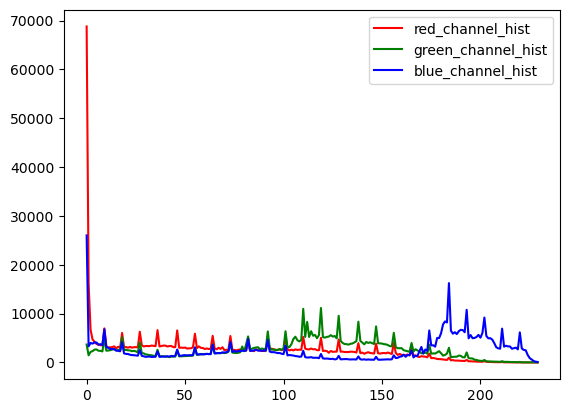

In [19]:
#Visualizamos el histograma de cada canal:

red_hist_segmentacion = cv.calcHist([im_r], [0], None, [bins], [0, 255])
green_hist_segmentacion = cv.calcHist([im_g], [0], None, [bins], [0, 255])
blue_hist_segmentacion = cv.calcHist([im_b], [0], None, [bins], [0, 255])

plt.plot(red_hist_segmentacion, color='red', label = 'red_channel_hist')
plt.plot(green_hist_segmentacion, color='green', label = 'green_channel_hist')
plt.plot(blue_hist_segmentacion, color='blue', label = 'blue_channel_hist')
plt.legend()

In [20]:
#Ahora segmentaremos usando numpy, tomaremos la media de la zona de interés y 3 desvíos standard 

def get_segmentation(img_area: np.array) -> plt.figure:
    # Calculamos un modelo estadístico sencillo para caracterizar el color deseado en el espacio RGB
    color_mean, color_std = cv.meanStdDev(img_area)

    # Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
    # para ¨capturar¨ el 99.7 % de pixeles.
    n_sigma = 3
    mask = cv.inRange(segmentacion_img_rgb, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
    img_segmentada = cv.bitwise_and(segmentacion_img_rgb, segmentacion_img_rgb, mask=mask)

    plt.figure(3)
    plt.imshow(img_segmentada)


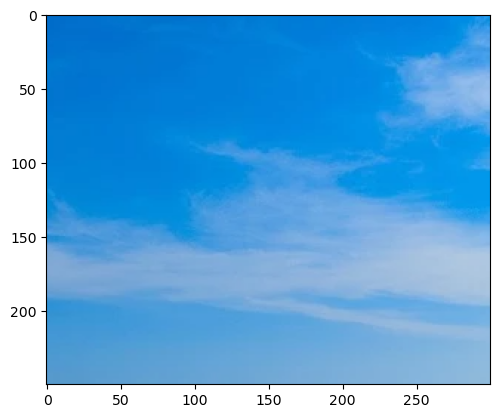

In [21]:
# Obtenemos una muestra del cielo que incluya un poco de nubes:
cielo = segmentacion_img_rgb[0:250, 400:700, :]
plt.imshow(cielo)

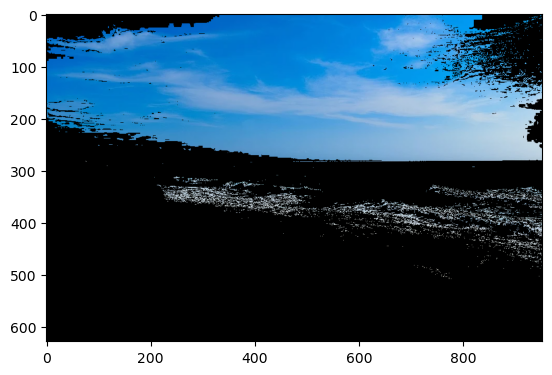

In [22]:
get_segmentation(cielo)

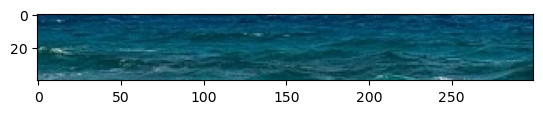

In [23]:
#Hacemos los mismo para el mar:
mar = segmentacion_img_rgb[290:330, 500:800, :]
plt.imshow(mar)

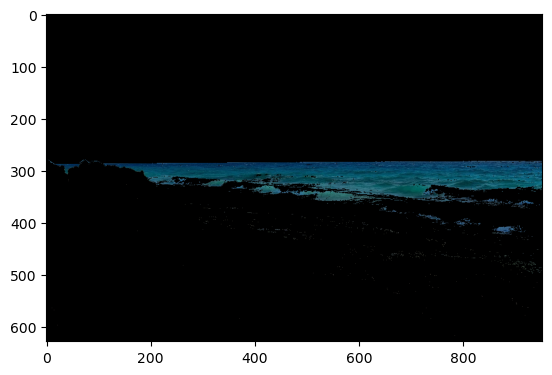

In [24]:
get_segmentation(mar)

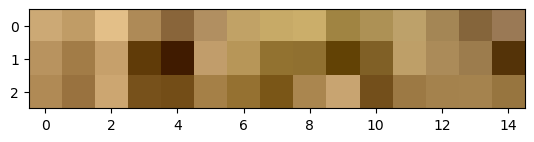

In [25]:
#Hacemos los mismo para la tierra:
tierra = segmentacion_img_rgb[-100:-97, 165:180, :]
plt.imshow(tierra)

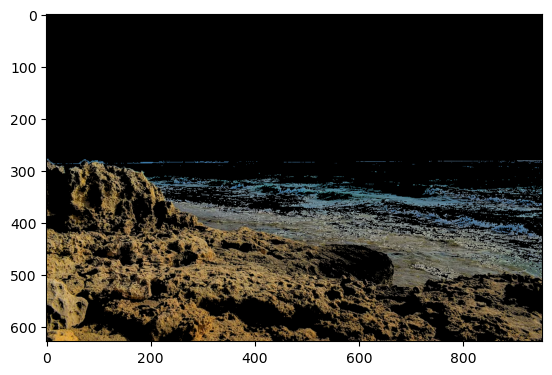

In [26]:
get_segmentation(tierra)

Vemos que el método usado no permite extraer solamente la tierra, porque aparecen partes del mar.
Usaremos el método HSV en el cual usamos el color medio de la tierra y sumar un threshold para arriba y restar otro para abajo y así obtener la intensidad de colores permitida para filtrar los colores tierra. 

Text(0.5, 1.0, 'Tierra segmentado')

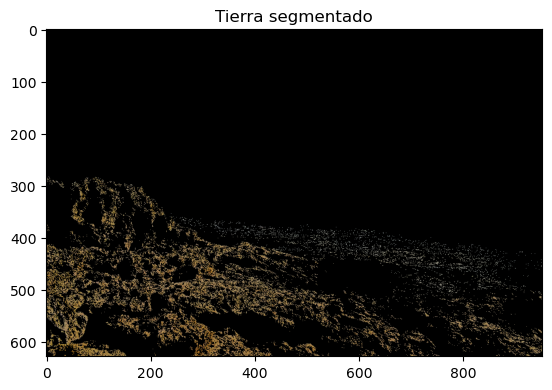

In [27]:
#Nos cuesta bastante filtrar por este método, asi que usaremos el método HSV:
img_segmentacion_HSV = cv.cvtColor(segmentacion_img_rgb, cv.COLOR_RGB2HSV)

im_h, im_s, im_v = cv.split(img_segmentacion_HSV)
color_h_medio, _, _ = np.mean(tierra, axis=(0,1))  #Saca el promedio por canal HSV

color_l = (color_h_medio-25, 10, 10)  #Del promedio de verde para abajo (low)
color_u = (color_h_medio+25, 150, 150) #Del promedio de verde para abajo (high)

mask = cv.inRange(segmentacion_img_rgb, color_l,  color_u)

img_segmentada = cv.bitwise_and(segmentacion_img_rgb, segmentacion_img_rgb, mask=mask)

plt.imshow(img_segmentada)
plt.title('Tierra segmentado')
